In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM

import io

In [28]:
symbol = "AAPL"

In [29]:
stock = yf.Ticker(symbol)
data = stock.history(period="max")

In [30]:
data.shape

(10736, 7)

In [31]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


In [32]:
df=data.reset_index()['Close']

In [33]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-10 00:00:00-04:00,189.259995,189.990005,187.039993,188.610001,59922200,0.0,0.0
2023-07-11 00:00:00-04:00,189.160004,189.300003,186.600006,188.080002,46638100,0.0,0.0
2023-07-12 00:00:00-04:00,189.679993,191.699997,188.470001,189.770004,60750200,0.0,0.0
2023-07-13 00:00:00-04:00,190.500000,191.190002,189.779999,190.539993,41342300,0.0,0.0
2023-07-14 00:00:00-04:00,190.229996,191.175003,189.630005,190.690002,40764621,0.0,0.0


Text(0, 0.5, 'Closing Price')

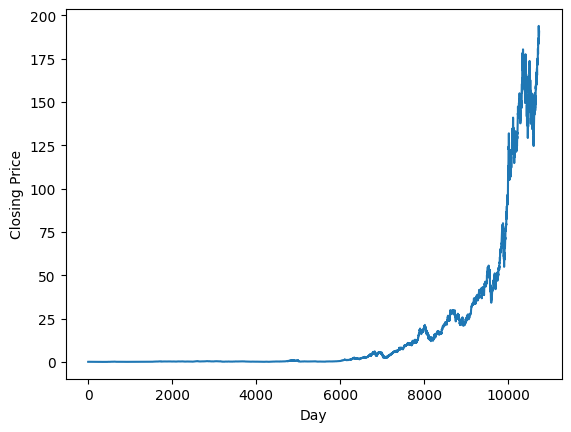

In [34]:
plt.plot(df,label='Closing Price')
plt.xlabel('Day')
plt.ylabel('Closing Price')

In [35]:
# SCALE THE DATA AS LSTM ARE SENSITIVE TO THE SCALE OF THE DATA.

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))

In [37]:
df1

array([[3.17029933e-04],
       [2.90240454e-04],
       [2.54516897e-04],
       ...,
       [9.78342929e-01],
       [9.82313338e-01],
       [9.83086853e-01]])

In [38]:
# DATA PREPROCESSING
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size

train_data=df1[0:training_size,:]
test_data=df1[training_size:len(df1),:1]

In [39]:
print(train_data.shape,test_data.shape)

(7515, 1) (3221, 1)


In [40]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

***TRAIN_TEST_SPLIT:***

In [77]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [42]:
print(x_train.shape), print(y_train.shape)

(7414, 100)
(7414,)


(None, None)

In [43]:
print(x_test.shape), print(y_test.shape)

(3120, 100)
(3120,)


(None, None)

In [44]:
# x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
# x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)
# x_train.shape

In [78]:
x_train = x_train[...,np.newaxis]
x_test = x_test[...,np.newaxis]

In [46]:
x_train.shape

(7414, 100, 1)

In [47]:
x_test.shape

(3120, 100, 1)

In [23]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['acc'])
# model = Sequential([LSTM(128, input_shape=(1, 1), return_sequences=True),
#                     Dropout(0.2),
#                     LSTM(64),
#                     Dropout(0.2),
#                     Dense(32, activation='relu'),
#                     Dense(1)])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 118,081
Trainable params: 118,081
Non-trai

In [78]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
116/116 [==============================] - 7s 19ms/step - loss: 9.1644e-06 - acc: 1.3488e-04 - val_loss: 0.0068 - val_acc: 3.2051e-04
Epoch 2/100
116/116 [==============================] - 1s 12ms/step - loss: 1.7903e-06 - acc: 1.3488e-04 - val_loss: 0.0035 - val_acc: 3.2051e-04
Epoch 3/100
116/116 [==============================] - 1s 13ms/step - loss: 1.3721e-06 - acc: 1.3488e-04 - val_loss: 0.0045 - val_acc: 3.2051e-04
Epoch 4/100
116/116 [==============================] - 1s 12ms/step - loss: 1.0325e-06 - acc: 1.3488e-04 - val_loss: 0.0055 - val_acc: 3.2051e-04
Epoch 5/100
116/116 [==============================] - 2s 16ms/step - loss: 1.1280e-06 - acc: 1.3488e-04 - val_loss: 0.0045 - val_acc: 3.2051e-04
Epoch 6/100
116/116 [==============================] - 1s 12ms/step - loss: 1.2406e-06 - acc: 1.3488e-04 - val_loss: 0.0043 - val_acc: 3.2051e-04
Epoch 7/100
116/116 [==============================] - 1s 12ms/step - loss: 1.1167e-06 - acc: 1.3488e-04 - val_loss: 0.0033 

In [118]:
model.save('model.h5')

In [48]:
from keras.models import load_model
model=load_model('/content/1model.h5')

In [79]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

98/98 [==============================] - 1s 5ms/step


In [50]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [51]:
# train_predict = train_predict.flatten()
# print(train_predict)

In [52]:
print(y_train)

[0.00029917 0.00030364 0.00029247 ... 0.0442205  0.04484346 0.04502659]


In [53]:
# type(y_train)
# type(train_predict)
# pred = list(train_predict)
# print(pred)
# yt = list(y_train)

In [54]:
# import math
# from sklearn.metrics import accuracy_score
# accuracy_score(yt,pred)

In [55]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))



1.9006461503057992

In [56]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

68.67307389553598

In [57]:
len(train_predict)

7414

In [58]:
len(test_predict)

3120

In [59]:
len(df1)

10736

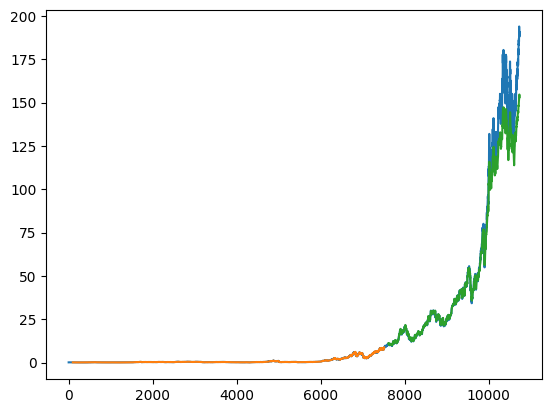

In [60]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

predict data for next month


In [81]:
len(test_data)

3221

In [80]:
x_input=test_data[3121:].reshape(1,-1)
x_input.shape

(1, 100)

In [82]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [64]:
temp_input

[0.7643755412937925,
 0.766589786823326,
 0.7691129346323331,
 0.7552612717447165,
 0.7614919550379518,
 0.7588658135753962,
 0.7480521880833572,
 0.7511418403274663,
 0.7775063272877418,
 0.7919244946104604,
 0.7804415283921141,
 0.7869811139648231,
 0.7752406242720199,
 0.764478534947341,
 0.774622741031901,
 0.7855392814963169,
 0.7875990758861134,
 0.8023261454883058,
 0.7979491905965989,
 0.8103075635295209,
 0.8199882588325274,
 0.8125218090590544,
 0.8181859879171876,
 0.8249831756455248,
 0.8148389695609647,
 0.8115948661771187,
 0.8276608532754403,
 0.8358482586237522,
 0.8489275084503415,
 0.855467172704222,
 0.8526865801019295,
 0.84305726360394,
 0.8476916632889322,
 0.8341489026807892,
 0.8278153044151771,
 0.8242107625844975,
 0.8523260629739243,
 0.8505238707397561,
 0.8506267857121329,
 0.8570119988262765,
 0.8629852373262266,
 0.8579387843458691,
 0.849545470371632,
 0.851141753979875,
 0.8431087997712999,
 0.84305726360394,
 0.8670016750899283,
 0.8735412606626372,
 0

In [67]:
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):

        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.7900758]
101
1 day input [0.76658979 0.76911293 0.75526127 0.76149196 0.75886581 0.74805219
 0.75114184 0.77750633 0.79192449 0.78044153 0.78698111 0.77524062
 0.76447853 0.77462274 0.78553928 0.78759908 0.80232615 0.79794919
 0.81030756 0.81998826 0.81252181 0.81818599 0.82498318 0.81483897
 0.81159487 0.82766085 0.83584826 0.84892751 0.85546717 0.85268658
 0.84305726 0.84769166 0.8341489  0.8278153  0.82421076 0.85232606
 0.85052387 0.85062679 0.857012   0.86298524 0.85793878 0.84954547
 0.85114175 0.8431088  0.84305726 0.86700168 0.87354126 0.87307783
 0.86767102 0.86205829 0.85351037 0.89357223 0.89321171 0.88430343
 0.89352069 0.89449909 0.88965202 0.88707379 0.88707379 0.89027077
 0.90243999 0.9030072  0.89805698 0.88444395 0.88588775 0.89181772
 0.90439939 0.914042   0.91378416 0.92842846 0.93286301 0.9257987
 0.92389084 0.91672338 0.93090361 0.93291462 0.94750731 0.94503223
 0.94833236 0.95895463 0.95333412 0.95379818 0.94838397 0.96405954
 0.96240944 0.95513891 0.96952537 0

In [68]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [159]:
len(df1)

10736

In [72]:
df1.shape

(10736, 1)

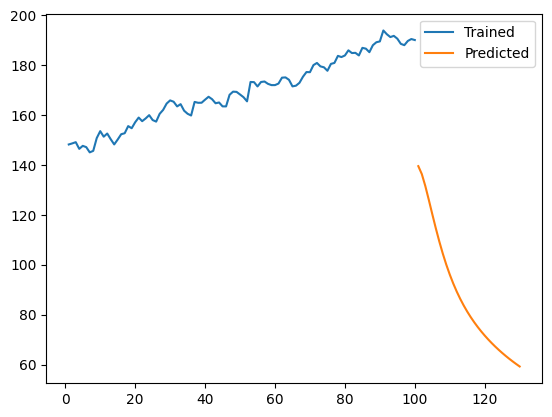

In [160]:
plt.plot(day_new,scaler.inverse_transform(df1[10636:]),label='Trained')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='Predicted')
plt.legend()
plt.show()

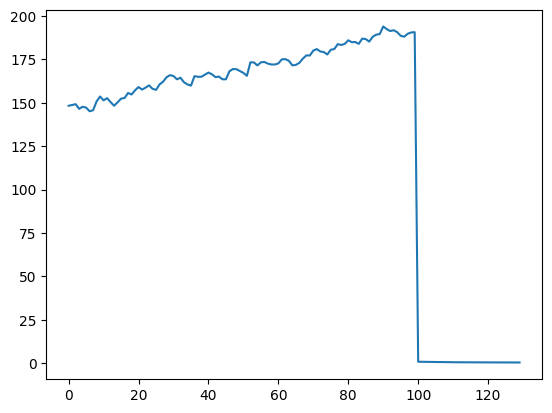

In [83]:
df3=df1.tolist()
# print(type(df3))
df3=scaler.inverse_transform(df3).tolist()
# print(type(df3))
# plt.plot(df3[10636:])
df3.extend(lst_output)
plt.plot(df3[10636:])

In [162]:
LSTM.history.keys()

AttributeError: ignored

In [163]:
plt.plot(LSTM.history['val_loss'])

AttributeError: ignored